# Libraries

In [1]:
from functions import *

In [2]:
df = sort_contours_using_uniform_pdf_and_group("dataset_contours_aggregate_by_patch.csv", "dataset_contours_aggregate_by_patch.json", 300, 5)
df

,image_name,"x coordinate in 0,0","y coordinate in 0,0",diameter (px),diameter (mm),area (px),area (mm2),group by diameter (px)
0,07_285.png,"[0.2970713437845234, -0.7029286562154766, -1.7...","[-105.70522082599973, -104.70522082599973, -10...",379.812012,11.394360,48862.0,43.97580,1
1,03_79.png,"[-47.469233911513356, -48.469233911513356, -49...","[-154.31924648064341, -153.31924648064341, -15...",343.155884,10.294677,53040.0,47.73600,1
2,10_66.png,"[-160.8672095948848, -161.8672095948848, -162....","[-45.71988119898219, -44.71988119898219, -44.7...",336.917114,10.107513,17620.5,15.85845,1
3,14_39.png,"[66.30820853348405, 65.30820853348405, 64.3082...","[-136.18410567957062, -135.18410567957062, -13...",328.806396,9.864192,35390.0,31.85100,1
4,06_329.png,"[21.75916763558689, 20.75916763558689, 19.7591...","[-124.68277548260471, -123.68277548260471, -12...",308.202179,9.246065,40423.0,36.38070,1
...,...,...,...,...,...,...,...,...
295,14_366.png,"[5.262921348314649, 4.262921348314649, 3.26292...","[-9.326591760299607, -8.326591760299607, -7.32...",23.324007,0.699720,222.5,0.20025,5
296,03_471.png,"[-2.601550387596717, -3.601550387596717, -4.60...","[-6.404651162790685, -5.404651162790685, -5.40...",22.113729,0.663412,215.0,0.19350,5
297,09_62.png,"[-3.1835839598998064, -4.183583959899806, -5.1...","[-9.106516290726631, -8.106516290726631, -8.10...",22.034351,0.661031,266.0,0.23940,5
298,15_451.png,"[-4.214529914529862, -4.214529914529862, -5.21...","[-7.925641025641028, -6.925641025641028, -5.92...",18.317446,0.549523,195.0,0.17550,5


tamanho do grupo 1:  60
324.81201171875
IDs dos centros selecionados: [57 31 47  2 22  0 60 41 36 40  3 34 19 54 52 17 16 23  9 43 63 30 38 26
 32 24 12 37 46 10 13 39 44 59 48 28 14 29 51  5  1 25 20  7 15 21 50 35
 62 18  8  4 58 61 42 53 45 56  6 55]
Grid 8 x 8 | célula 312.50 x 312.50 px
Exemplos: [0, 1, 2, 3, 4] [[ 156.25  156.25]
 [ 468.75  156.25]
 [ 781.25  156.25]
 [1093.75  156.25]
 [1406.25  156.25]]


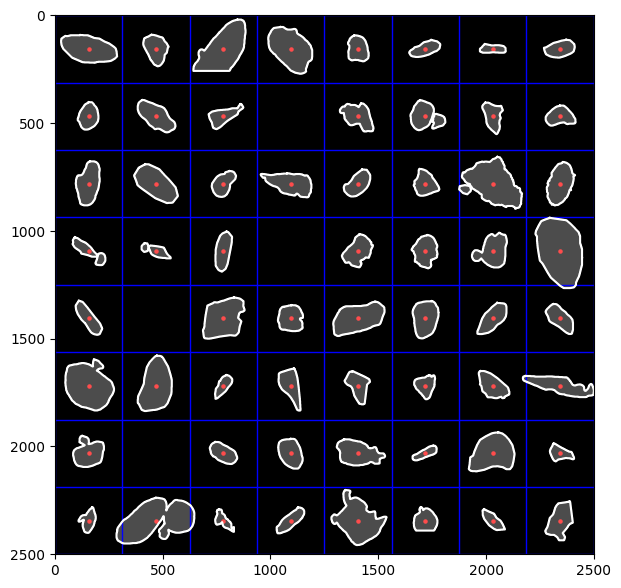

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Build a grid
i = 1
img_w, img_h = 2500, 2500 
df_group = df[df['group by diameter (px)'] == i]
print("tamanho do grupo 1: ", len(df_group))
target_size = df_group['diameter (px)'].max()
target_size -= 55
print(target_size)
x_df = df_group['x coordinate in 0,0'].values
y_df = df_group['y coordinate in 0,0'].values

# ----------------- Cálculo do grid -----------------
nx = int(round(img_w / target_size))   # número de colunas
ny = int(round(img_h / target_size))   # número de linhas

cell_w = img_w / nx
cell_h = img_h / ny

# ----------------- Geração dos centroides e IDs -----------------
centers = []   # [(cx, cy), ...]
ids = []       # [0, 1, 2, ...]
for j in range(ny):          # linhas (y)
    for i in range(nx):      # colunas (x)
        cx = (i + 0.5) * cell_w
        cy = (j + 0.5) * cell_h
        centers.append((cx, cy))
        ids.append(j * nx + i)

center_ids_selected = np.random.choice(ids, size=len(df_group), replace=False)
print("IDs dos centros selecionados:", center_ids_selected)
centers = np.array(centers)

print(f"Grid {nx} x {ny} | célula {cell_w:.2f} x {cell_h:.2f} px")
print("Exemplos:", ids[:5], centers[:5])

fig, ax = plt.subplots(figsize=(7, 7))
# Fundo branco (substitua por sua imagem se necessário)
ax.imshow(np.ones((img_h, img_w)), cmap="gray", extent=[0, img_w, img_h, 0])
# Grid em azul
for i in range(nx + 1):
    x = i * cell_w
    ax.axvline(x, color='blue', linewidth=1)
for j in range(ny + 1):
    y = j * cell_h
    ax.axhline(y, color='blue', linewidth=1)

# Loop para plotar um por um
cont = 0
for j in center_ids_selected:
    cx, cy = centers[j, 0], centers[j, 1]
    ax.scatter(cx, cy, c='red', s=5)
    x_new, y_new = transport_polygon(x_df[cont], y_df[cont], cx, cy)
    ax.plot(x_new, y_new, 'white')
    ax.fill(x_new, y_new, 'white', alpha=0.3)
    cont += 1


    # Plota o ponto atual
    
    # # Opcional: Limitar o número de labels na legenda
    # if len(ax.get_legend_handles_labels()[0]) > 10:
    #     ax.legend_.remove()
plt.show()  # Mantém a janela aberta após o loop

# # Centroides em vermelho
# ax.scatter(centers[:, 0], centers[:, 1], c='red')

# ax.set_xlim(0, img_w)
# ax.set_ylim(img_h, 0)  # inverte eixo Y para coordenadas de imagem
# ax.set_aspect('equal')
# ax.set_title("Grid em azul + Centroides em vermelho")
# ax.axis("off")
# plt.show()


In [2]:
# import numpy as np
# import matplotlib.pyplot as plt

# matriz = np.zeros((5,5), dtype=np.uint8)
# matriz[1:4, 1:4] = 255

# np.savetxt("matriz.txt", matriz, fmt='%d')  # Salva como texto

# # Carrega de volta
# matriz_carregada = np.loadtxt("matriz.txt", dtype=np.uint8)

# plt.imshow(matriz_carregada, cmap="gray")
# plt.show()

# Gross section generator

estou aqui:  51034 (2500, 2500)


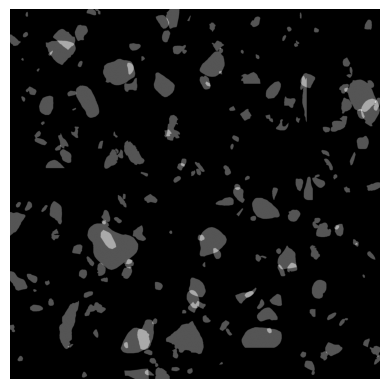

In [ ]:
generate_canvas_from_json("dataset_contours_aggregate_by_patch.json", (2500, 2500), 300)